# [통계분석] 대출 상환 리스크 예측분석

## 0.공통

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('_mpl-gallery') # matplotlib의 시각화 스타일 지정
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic') #윈도우에서는 malgun gothic
plt.rc('axes', unicode_minus=False)

font = {'fontsize':18, 'fontstyle':'italic', 'backgroundcolor':'white', 'color':'black', 'fontweight': 'bold'} # for plot title

# 표시할 최대 행 수를 None으로 설정하여 모든 행을 출력
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 1. 데이터 준비

### 1.1 데이터 로드

In [3]:
import pandas as pd

data = pd.read_csv('1)대출상환/home-credit-default-risk/application_train.csv', sep=',')


### 1.1.1 사용할 변수들 추출

In [4]:
using_cols = ['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'DAYS_BIRTH', 'NAME_FAMILY_STATUS', 
              'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE',
              'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
              'NAME_INCOME_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_EMAIL', 
              'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION']

df = data[using_cols].copy()


### <b>Column Definition and Key value</b>
| 변수명	| 데이터 형태 | 측정척도 | 설명	| 
|---------|--------------|--------------|-----------------------------------------------|
| SK_ID_CURR | 범주형 | 명목척도 | 대출ID	|
| TARGET	  | 범주형 | 명목척도 | 1: 지급 문제를 가진 고객 (샘플 내 대출의 첫 Y회 할부 중 적어도 한 번 이상 X일 이상 연체한 경우), 0: 그 외 모든 경우 | 
| CODE_GENDER |	범주형 | 명목척도 | 고객의 성별	 |
| DAYS_BIRTH	 | 수치형 | 비율척도 | 신청 시점에서 고객의 나이(일 기준) |
| NAME_FAMILY_STATUS | 범주형 | 명목척도	 | 고객의 가족 상태 |
| CNT_FAM_MEMBERS	| 수치형 | 비율척도 |  고객의 가족 구성원 수 |
| CNT_CHILDREN	| 수치형 | 비율척도 | 고객의 자녀 수 |
| NAME_EDUCATION_TYPE	| 범주형 | 명목척도 | 고객이 달성한 최고 교육 수준 | 
| OCCUPATION_TYPE	| 범주형 | 명목척도 | 고객의 직업 유형 |
| FLAG_OWN_CAR	| 범주형 | 명목척도 | 고객이 자동차를 소유하고 있는지 여부 (1=예, 0=아니오) |
| FLAG_OWN_REALTY	| 범주형 | 명목척도 | 고객이 집이나 아파트를 소유하고 있는지 여부 (1=예, 0=아니오) |
| AMT_CREDIT	| 수치형 | 비율척도 | 대출 금액 | 
| AMT_INCOME_TOTAL	| 수치형 | 비율척도 | 고객의 소득 |
| NAME_INCOME_TYPE	 | 범주형 | 명목척도 | 고객의 소득 유형 (사업가, 근로자, 출산휴가 등)|
| FLAG_MOBIL	| 범주형 | 명목척도 | 고객이 휴대전화를 제공했는지 여부 (1=예, 0=아니오) |
| FLAG_EMP_PHONE	| 범주형 | 명목척도 | 고객이 업무용 전화를 제공했는지 여부 (1=예, 0=아니오) |
| FLAG_EMAIL	 | 범주형 | 명목척도 | 고객이 이메일을 제공했는지 여부 (1=예, 0=아니오) | 
| REGION_RATING_CLIENT	| 범주형 | 명목척도 | 고객이 거주하는 지역의 평가 등급 (1, 2, 3) |
| REG_REGION_NOT_WORK_REGION	| 범주형 | 명목척도  | 고객의 영구 주소와 직장 주소가 일치하지 않는지 여부 (1=다름, 0=같음, 지역 수준) | 

### 1.2 데이터 구조 확인

#### 1.2.1 주요 정보 요약
* 결측치 파악: 데이터셋의 열별로 결측값 비율을 빠르게 확인 가능.
* 데이터 타입 확인: 데이터를 분석/처리하기 전에 필요한 데이터 타입인지 검증.
-> 데이터의 품질과 구조를 빠르게 이해하는 데 유용합니다.

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   CODE_GENDER                 307511 non-null  object 
 3   DAYS_BIRTH                  307511 non-null  int64  
 4   NAME_FAMILY_STATUS          307511 non-null  object 
 5   CNT_FAM_MEMBERS             307509 non-null  float64
 6   CNT_CHILDREN                307511 non-null  int64  
 7   NAME_EDUCATION_TYPE         307511 non-null  object 
 8   OCCUPATION_TYPE             211120 non-null  object 
 9   FLAG_OWN_CAR                307511 non-null  object 
 10  FLAG_OWN_REALTY             307511 non-null  object 
 11  AMT_CREDIT                  307511 non-null  float64
 12  AMT_INCOME_TOTAL            307511 non-null  float64
 13  NAME_INCOME_TY

* [해석]
    * 종속변수 (Y): TARGET
        * 값의 의미:
            * 0: 대출 상환 성공
            * 1: 대출 상환 불이행
        * 특이점:
            * 이진 분류 문제로 설정.
            * 클래스 불균형 여부를 확인해야 함
    * 독립변수 : 
        * 나이 : 실제로는 DAYS_BIRTH 
            * 신청 시점에서 고객의 나이(일 기준)로 실제 수치값을 확인 해 본 후 연령으로 변환작업 필요
        * 직업유형 : OCCUPATION_TYPE
            * 결측치 비율이 높음. 적절한 결측치 처리 전략 필요(결측치 자체를 한 범주로 간주하거나, 다른 변수 기반으로 보완).

#### 1.2.2 수치형 데이터(숫자형 변수)의 요약 통계량

In [6]:
# 수치형 변수만 선택
numeric_data = df.select_dtypes(include=['number'])

# 수치형 변수 요약정보 확인
numeric_summary = numeric_data.describe()
numeric_summary

,SK_ID_CURR,TARGET,DAYS_BIRTH,CNT_FAM_MEMBERS,CNT_CHILDREN,AMT_CREDIT,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION
count,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,-16036.995067,2.152665,0.417052,5.990260e+05,1.687979e+05,0.999997,0.819889,0.056720,2.052463,0.050769
std,102790.175348,0.272419,4363.988632,0.910682,0.722121,4.024908e+05,2.371231e+05,0.001803,0.384280,0.231307,0.509034,0.219526
min,100002.000000,0.000000,-25229.000000,1.000000,0.000000,4.500000e+04,2.565000e+04,0.000000,0.000000,0.000000,1.000000,0.000000
25%,189145.500000,0.000000,-19682.000000,2.000000,0.000000,2.700000e+05,1.125000e+05,1.000000,1.000000,0.000000,2.000000,0.000000
50%,278202.000000,0.000000,-15750.000000,2.000000,0.000000,5.135310e+05,1.471500e+05,1.000000,1.000000,0.000000,2.000000,0.000000
75%,367142.500000,0.000000,-12413.000000,3.000000,1.000000,8.086500e+05,2.025000e+05,1.000000,1.000000,0.000000,2.000000,0.000000
max,456255.000000,1.000000,-7489.000000,20.000000,19.000000,4.050000e+06,1.170000e+08,1.000000,1.000000,1.000000,3.000000,1.000000


* [해석]
    * 종속변수
        * TARGET - 대출상환여부
            * Mean (0.080729) : 전체데이터에서 8.07%의 고객이 대출 상환을 불이행 - 클래스 불균형 문제 존재, 모델링시 클래스 불균형 처리 필요
            * Min/Max (0/1) : 값이 0또는 1로 구성된 이진 분류 문제임을 확인
    * 독립변수
        * DAYS_BIRTH - 나이
            * Mean (-16036.99): 평균 나이는 약 16036일(절대값 기준 약 44년).
            * Min (-25229): 가장 나이가 많은 사람은 25229일(약 69년).
            * Max (-7489): 가장 나이가 어린 사람은 7489일(약 20년).
        * CNT_FAM_MEMBERS - 가족 구성원 수
            * Max (20): 최대 가족 구성원 수가 20명으로 비현실적인 이상치일 가능성이 있음. - 이상치 처리가 필요할 수 있음
        * CNT_CHILDREN - 자녀 수
            * Max (19): 최대 자녀 수가 19명으로, 이 역시 이상치일 가능성이 높음
        * AMT_INCOME_TOTAL - 총 소득
            * Max (117000000): 최대 소득이 117,000,000 달러 단위로, 비현실적으로 높은 이상치가 존재.
        * FLAG_EMAIL - 이메일 제공 여부
            * Mean (0.056720): 약 5.67만 이메일 정보를 제공. - 이메일 제공 여부는 대출 상환 가능성과 큰 상관관계가 없을 가능성이 큼
            


#### 1.2.3 범주형 데이터(문자형 변수)의 요약 통계량

In [7]:
# 문자형 변수만 선택
categorical_data = df.select_dtypes(exclude=['number'])

# 문자형 변수 요약정보 확인
categorical_summary = categorical_data.describe()
categorical_summary

,CODE_GENDER,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE
count,307511,307511,307511,211120,307511,307511,307511
unique,3,6,5,18,2,2,8
top,F,Married,Secondary / secondary special,Laborers,N,Y,Working
freq,202448,196432,218391,55186,202924,213312,158774


* [해석]
    * OCCUPATION_TYPE - 직업 유형
        * 결측치 존재 : 직업 유형은 211,120명만 값이 기록되어 있어 결측치가 96,391명 존재.
            * 결측치가 많은 이유를 확인하고, 처리방안을 결정해야함 (Unknown 범주 추가)

## 2. 통계 분석 및 가설검정

### 2.1 기술 통계 분석
* 주요 변수의 요약 통계량 계산
* 데이터를 요약하고 시각적으로 이해하는 데 초점을 둔 필수적인 데이터 분석 기법
* 데이터의 패턴을 파악하고, 이후 추론 통계나 머신러닝 분석을 위한 기초 단계를 제공

#### 2.1.1 상관계수 확인

##### 2.1.1.1 범주형 변수의 상관계수 확인
* 범주형 데이터는 값 간의 크기나 차이를 계산할 수 없기 때문에 빈도수를 기반으로 관계를 분석
* 카이제곱 검정활용
    * 두 변수의 분포를 비교해 독립인지 아닌지 판단
    * 두 변수가 독립적이라면 관계가 없고, 독립적이지 않다면 상관관계가 있다고 볼 수 있다.
    * 카이제곱 검정 결과를 지표로 변환하면 두 변수 간의 관계 강도를 0에서 1사이 값으로 표현 가능


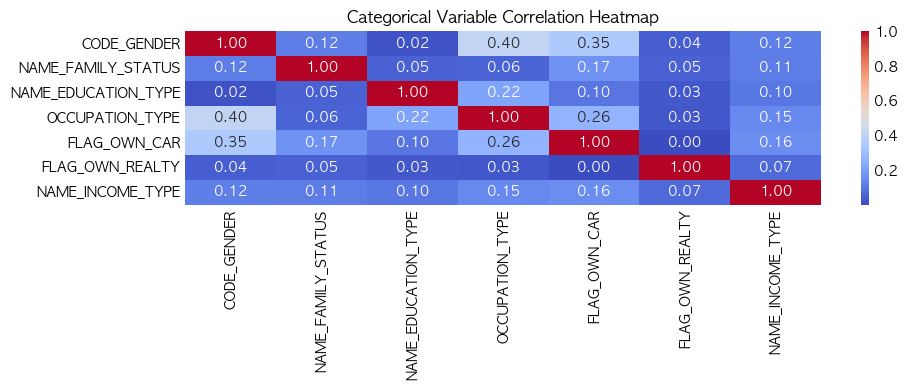

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

fig, ax = plt.subplots(figsize=(10, 4))

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # 교차표 생성
    chi2, _, _, _ = chi2_contingency(contingency_table)  # 카이제곱 검정
    n = contingency_table.sum().sum()  # 총 샘플 수
    r, k = contingency_table.shape  # 교차표의 행과 열 개수
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# 다중 범주형 변수의 상관계수 계산
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # 범주형 변수 선택
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Heatmap 시각화
ax = sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Categorical Variable Correlation Heatmap")
plt.tight_layout()
plt.show()

* [해석]
    * 성별
        * CODE_GENDER(성별)와 OCCUPATION_TYPE(직업유형)의 상관관계
            * 상관계수가 0.40으로, 두 변수 간의 중간 정도의 상관관계가 있음
            * 예: 성별에 따라 직업 유형이 어느 정도 연관이 있을 가능성이 있음.
        * CODE_GENDER(성별)와 FLAG_OWN_CAR(차량소유여부)의 상관관계
            * 상관계수가 0.35로, 성별과 차량 소유 여부 간에도 중간 정도의 상관관계가 있음.
            * 예: 특정 성별에서 차량 소유가 더 흔할 가능성이 있음.
        * 이는 대출 상환 여부와 성별간의 관계를 분석할때 고려할 만한 요인 일 수 있다.
    * 이 히트맵을 통해 변수 간 상관관계를 파악했으며, 중간 정도의 상관관계가 있는 변수들(CODE_GENDER, OCCUPATION_TYPE 등)을 추가 분석 대상으로 삼을 수 있습니다.
    * 전반적으로 강한 상관관계는 발견되지 않았으므로, 각 변수를 독립적인 특성으로 간주하여 분석하는 것이 적합할 수 있다.

##### 2.1.1.2 숫자형 변수의 상관계수 확인

* Pearson 상관계수를 기본으로 사용하며, 변수 간 선형 관계를 측정합니다.
* 상관계수 값의 범위
    * +1: 완벽한 양의 상관관계 (한 변수가 증가하면 다른 변수도 비례 증가).
    * 0: 상관관계 없음.
    * -1: 완벽한 음의 상관관계 (한 변수가 증가하면 다른 변수는 비례 감소).
* 수치형 변수에서 Pearson 상관계수를 사용하는 이유는, 이 지표가 두 변수 간의 선형 관계를 간단하고 직관적으로 측정할 수 있기 때문
* 다만, 관계가 비선형이거나 이상치가 많을 경우, 다른 상관계수(Spearman, Kendall 등)로 보완 분석이 필요

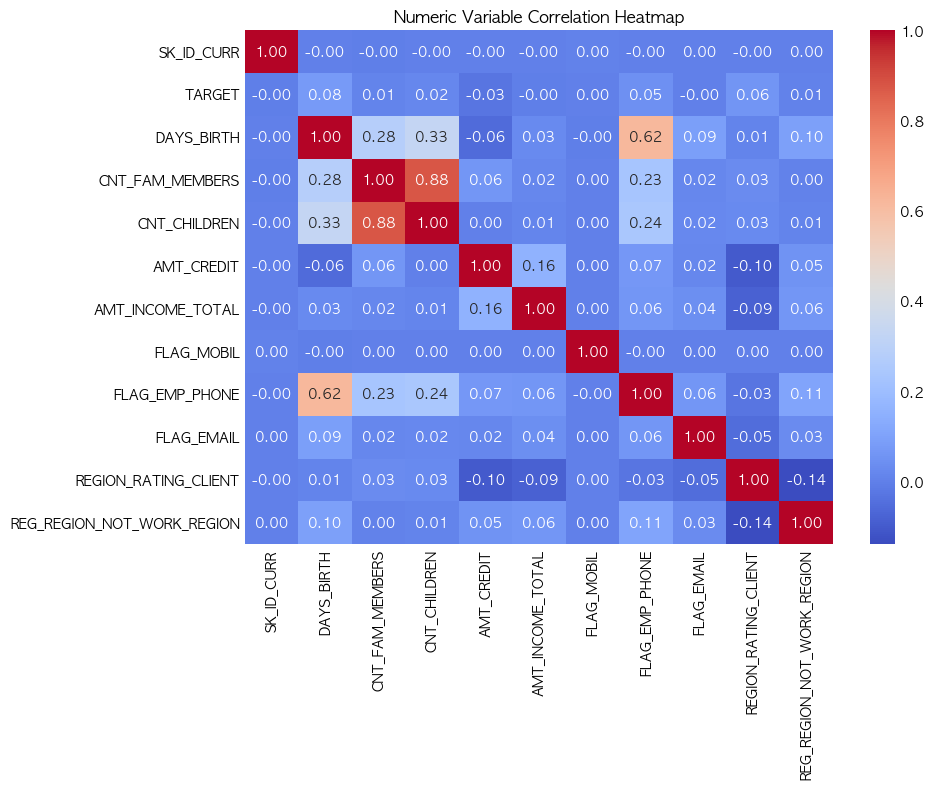

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.select_dtypes(include=['number']).corr().drop(columns='TARGET'),  annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Numeric Variable Correlation Heatmap")
plt.tight_layout()
plt.show()

* [해석]
    * CNT_CHILDREN(자녀수)와 CNT_FAM_MEMBERS(가족구성원수) 상관계수
        * 상관계수: 0.88 (높은 양의 상관관계).
        * 중복된 정보일 가능성이 있어, 모델링 시 하나의 변수만 선택하거나 새로운 변수를 생성(예: 성인 구성원 수)고려
    * FLAG_MOBIL(휴대전화 제공 여부)
        * 다른 변수들과 상관관계가 거의 없음(0.00 수준).
        * 대부분의 고객이 휴대전화 정보를 제공하므로, FLAG_MOBIL은 정보량이 적어 모델링에 큰 기여를 하지 않을 가능성이 큼. - 제거 검토
    * 추가파생변수 생성 고려
        * AMT_CREDIT 대비 AMT_INCOME_TOTAL 비율과 같은 추가 파생 변수를 생성해 요인 분석 필요

#### 2.1.2 데이터 정제 및 데이터 탐색

##### 2.1.2.1  상관계수 및 요약통계량을 통한 변수 처리대상
* 나이변수(AGE) 재생성 - DAYS_BIRTH변수를 나이 변환
* 가족구성원수(CNT_FAM_MEMBERS) - 이상치 확인후 처리여부 결정
* 자녀수(CNT_CHILDREN) - 이상치 확인 후 처리여부 결정
* 가족구성원수(CNT_FAM_MEMBERS)와  자녀수(CNT_CHILDREN) 관계를 확인 후 변수 하나만 사용
* 총소득(AMT_INCOME_TOTAL) - 이상치 확인후 처리
* 휴대전화 제공 여부(FLAG_EMAIL) - 제공한 사람이 거의 없으므로 제외할지 여부
* 추가변수 생성 : 총 소득과 대출금액 비율 -  AMT_CREDIT / AMT_INCOME_TOTAL
* 직업유형(OCCUPATION_TYPE) - 결측치 처리 여부 결정 (UNKOWN)

##### 2.1.2.2 나이변수(AGE) 생성 및 시각화

In [10]:
# 절대값을 사용하여 DAYS_BIRTH를 나이로 변환
df['AGE'] = (df['DAYS_BIRTH'].abs() / 365).astype(int)
# DAYS_BIRTH 변수 삭제
df = df.drop(columns=['DAYS_BIRTH'])
# 결과 출력
df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,AGE
0,100002,1,M,Single / not married,1.0,0,Secondary / secondary special,Laborers,N,Y,406597.5,202500.0,Working,1,1,0,2,0,25
1,100003,0,F,Married,2.0,0,Higher education,Core staff,N,N,1293502.5,270000.0,State servant,1,1,0,1,0,45
2,100004,0,M,Single / not married,1.0,0,Secondary / secondary special,Laborers,Y,Y,135000.0,67500.0,Working,1,1,0,2,0,52
3,100006,0,F,Civil marriage,2.0,0,Secondary / secondary special,Laborers,N,Y,312682.5,135000.0,Working,1,1,0,2,0,52
4,100007,0,M,Single / not married,1.0,0,Secondary / secondary special,Core staff,N,Y,513000.0,121500.0,Working,1,1,0,2,0,54


* 나이변수(AGE)와 대출상환가능성(TARGET) 변수와의 관계
    * 히스토그램 챠트 사용
        * 종속변수의 클래스 불균형을 고려하여 오버샘플링 후 시각화

Original Class Distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64
Balanced Class Distribution:
TARGET
0    282686
1    282686
Name: count, dtype: int64


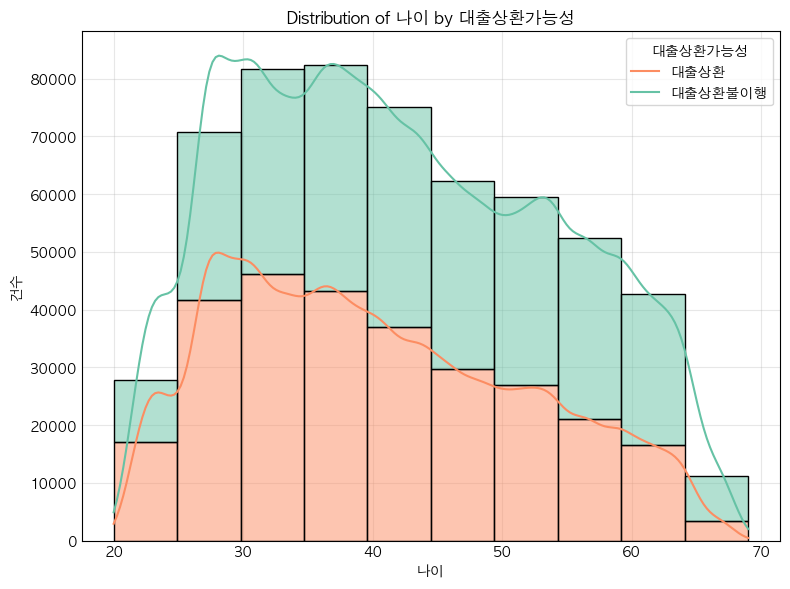

In [11]:
from sklearn.utils import resample


# 클래스 불균형 확인
print("Original Class Distribution:")
print(df['TARGET'].value_counts())

# 언더샘플링 또는 오버샘플링
# 소수 클래스 추출
minority_class = df[df['TARGET'] == 1]
majority_class = df[df['TARGET'] == 0]

# 오버샘플링
minority_oversampled = resample(minority_class, 
                                replace=True,    # 복원 추출
                                n_samples=len(majority_class), # 다수 클래스와 동일한 크기로
                                random_state=42)

# 균형 데이터프레임 생성
balanced_df = pd.concat([majority_class, minority_oversampled]).reset_index(drop=True)

# 클래스 분포 확인
print("Balanced Class Distribution:")
print(balanced_df['TARGET'].value_counts())

# AGE 기준으로 TARGET 변수의 분포를 히스토그램으로 시각화
plt.figure(figsize=(8, 6))
sns.histplot(data=balanced_df, x='AGE', hue='TARGET', multiple='stack', bins=10, kde=True)
plt.title('Distribution of 나이 by 대출상환가능성')
plt.xlabel('나이')
plt.ylabel('건수')
plt.legend(title='대출상환가능성', labels=['대출상환', '대출상환불이행'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



* [해석]
    *  히스토그램은 AGE 변수(나이)에 따라 TARGET 변수(대출 상환 가능성 또는 상환 불이행)를 시각화
        * 나이가 어린 그룹(20대~30대 초반)에서 상환 불이행(TARGET=1) 비율이 상대적으로 높다.
            * 젊은 고객층에서 재정적 불안정성이 더 클 가능성이 있음     
        * 중년층(40대~50대)에서는 TARGET=0(상환 문제 없음)의 비율이 상대적으로 높다.
            * 이는 나이가 많아질수록 소득 안정성과 신용 관리 능력이 향상될 가능성이 있음
        * 고령층(60대 이후)에서의 분포
            * 60대 이상에서는 TARGET=1 비율이 다시 증가하는 경향을 관찰 가능
            * 이는 고령층이 소득 감소 또는 재정적 지원 부족으로 인해 대출 상환에 어려움을 겪을 가능성이 있음

    * 나이(AGE)변수는 가설검정과 로지스틱 회귀를 통한 중요 요인분석을 진행할 대상으로 판단됩니다.




##### 2.1.2.2 가족구성원수(CNT_FAM_MEMBERS)와 자녀수(CNT_CHILDREN) 이상치 처리 및 시각화
* Scatter Plot 확인
    * 두 변수 간 관계에서 비정상적으로 높은 점들을 확인 가능

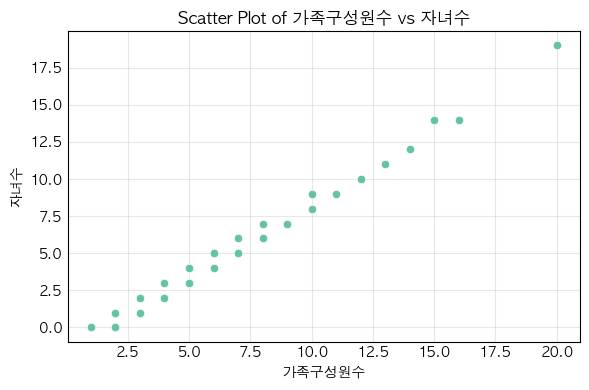

In [12]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='CNT_FAM_MEMBERS', y='CNT_CHILDREN', data=df[['CNT_FAM_MEMBERS', 'CNT_CHILDREN']])
plt.title('Scatter Plot of 가족구성원수 vs 자녀수')
plt.xlabel('가족구성원수')
plt.ylabel('자녀수')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [13]:
df[df['CNT_FAM_MEMBERS'] > 14]

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,AGE
155369,280108,0,F,Single / not married,20.0,19,Secondary / secondary special,Waiters/barmen staff,N,Y,269550.0,112500.0,Working,1,1,0,2,0,30
176011,303956,0,M,Separated,15.0,14,Secondary / secondary special,Drivers,Y,Y,1085058.0,225000.0,Working,1,1,0,2,0,48
183878,313127,0,F,Married,16.0,14,Secondary / secondary special,NaN,Y,N,810000.0,45000.0,Pensioner,1,0,0,2,0,55
265784,407877,0,F,Single / not married,20.0,19,Higher education,Core staff,N,Y,135000.0,112500.0,Working,1,1,0,2,0,28
267998,410527,0,F,Married,16.0,14,Secondary / secondary special,Managers,N,N,604152.0,54000.0,Working,1,1,0,2,0,42


* [해석]
    * 가족구성원수와 자녀수는 강한 양의 상관관계가 보이며, IQR을 이용한 극단값 제외처리 후 분석 진행합니다.
    * 또한 두 변수는 강한 상관관계를 보이는 결과 검증하려는 대상인 자녀수 특성을 검증대상으로 채택, 가족 구성원수 특정은 제거 후 분석 진행합니다.

* 가족구성원수(CNT_FAM_MEMBERS)와 자녀수(CNT_CHILDREN) 이상치 제거

In [14]:
# IQR 계산 함수 정의
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1사분위수
    Q3 = df[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = Q1 - 1.5 * IQR  # 하한값
    upper_bound = Q3 + 1.5 * IQR  # 상한값

    print(column, lower_bound, upper_bound)
    # 이상치 제거
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 가족구성원수 열의 이상치를 제거
df = remove_outliers_iqr(df, 'CNT_FAM_MEMBERS')
# 자녀수 열의 이상치를 제거
df = remove_outliers_iqr(df, 'CNT_CHILDREN')

# 결과 출력
df = df.drop(columns=['CNT_FAM_MEMBERS'])

df.head()

CNT_FAM_MEMBERS 0.5 4.5
CNT_CHILDREN -1.5 2.5


,SK_ID_CURR,TARGET,CODE_GENDER,NAME_FAMILY_STATUS,CNT_CHILDREN,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_CREDIT,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,AGE
0,100002,1,M,Single / not married,0,Secondary / secondary special,Laborers,N,Y,406597.5,202500.0,Working,1,1,0,2,0,25
1,100003,0,F,Married,0,Higher education,Core staff,N,N,1293502.5,270000.0,State servant,1,1,0,1,0,45
2,100004,0,M,Single / not married,0,Secondary / secondary special,Laborers,Y,Y,135000.0,67500.0,Working,1,1,0,2,0,52
3,100006,0,F,Civil marriage,0,Secondary / secondary special,Laborers,N,Y,312682.5,135000.0,Working,1,1,0,2,0,52
4,100007,0,M,Single / not married,0,Secondary / secondary special,Core staff,N,Y,513000.0,121500.0,Working,1,1,0,2,0,54


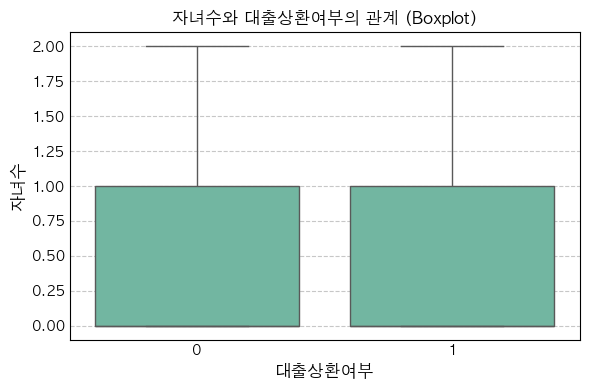

In [15]:
# Boxplot 그리기
plt.figure(figsize=(6, 4))
sns.boxplot(x='TARGET', y='CNT_CHILDREN', data=df)
plt.title('자녀수와 대출상환여부의 관계 (Boxplot)')
plt.xlabel('대출상환여부', fontsize=12)
plt.ylabel('자녀수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* [해석]
    * 자녀수와 대출상환여부 간의 관계는 강한 차이가 관찰되지 않음
        * 대출상환 여부가 0(미상환) 또는 1(상환)일 때, 자녀 수 분포는 거의 동일한 경향을 보임
        * 자녀 수가 많은 데이터(2명 이상)는 희소하며, 대부분 자녀 수가 적은 데이터로 구성


##### 2.1.2.6 총소득(AMT_INCOME_TOTAL) 이상치 처리 및 시각화

In [16]:
# 숫자로 일반 표기법으로 변환
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].apply(lambda x: f"{x:.0f}").astype(int)


* 총소득(AMT_INCOME_TOTAL) 변수의 IQR기반 이상치 제거

In [17]:
# 총소득 열의 이상치를 제거
df = remove_outliers_iqr(df, 'AMT_INCOME_TOTAL')

AMT_INCOME_TOTAL -22500.0 337500.0


* Density Plot으로 총소득(AMT_INCOME_TOTAL)과 대출상환가능성(TARGET) 간의 분포를 비교

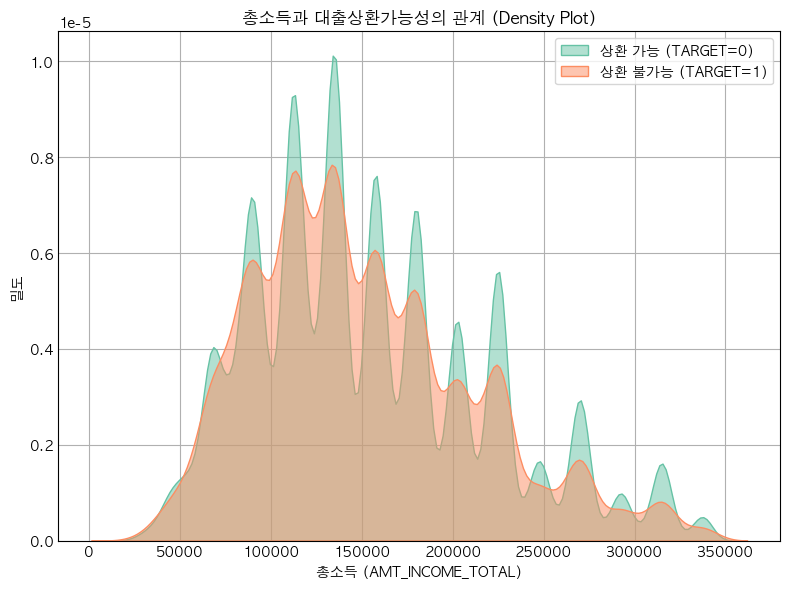

In [18]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['TARGET'] == 0], x='AMT_INCOME_TOTAL', fill=True, label='상환 가능 (TARGET=0)', alpha=0.5)
sns.kdeplot(data=df[df['TARGET'] == 1], x='AMT_INCOME_TOTAL', fill=True, label='상환 불가능 (TARGET=1)', alpha=0.5)
plt.title('총소득과 대출상환가능성의 관계 (Density Plot)')
plt.xlabel('총소득 (AMT_INCOME_TOTAL)')
plt.ylabel('밀도')
plt.legend()
plt.tight_layout()
plt.show()

* [해석]
    * 대출상환 가능성(TARGET=0, 상환 가능):
        * 분포가 상대적으로 넓고, 고소득 구간(150,000~)에서 밀도가 더 높습니다.
            * 이는 대출을 상환할 가능성이 있는 사람들이 고소득일 가능성이 높다는 것을 시사
    * 대출상환 불가능성(TARGET=1, 상환 불가능):
        * 저소득 구간(50,000~150,000)에서 밀도가 더 높다.
            * 이는 대출 상환에 어려움을 겪는 사람들이 상대적으로 저소득층일 가능성을 시사
    * 총소득이 낮을수록 대출상환 가능성이 낮아질 확률이 높다.
    * 총소득이 높을수록 대출상환 가능성이 높아진다.

##### 2.1.2.7 휴대전화 제공 여부(FLAG_EMAIL) 제거

In [19]:
df['FLAG_EMAIL'].value_counts(normalize=True) * 100

FLAG_EMAIL
0    94.638132
1     5.361868
Name: proportion, dtype: float64

In [20]:
from scipy.stats import entropy

value_counts = df['FLAG_EMAIL'].value_counts(normalize=True)
entropy_value = entropy(value_counts)
print(f"엔트로피 값: {entropy_value}")

엔트로피 값: 0.2090354329863053


In [21]:
import numpy as np

correlation = np.corrcoef(df['FLAG_EMAIL'], df['TARGET'])[0, 1]
print(f"상관계수: {correlation}")

상관계수: -0.0015207397934339122


* [해석]
    * 비율 편중, 낮은 엔트로피, 거의 없는 상관관계(-0.00152)를 고려할 때, FLAG_EMAIL 변수는 분석 및 예측 모델에서 큰 영향을 미치지 않을 가능성이 높다.
        * 따라서 제거해도 무방합니다.

In [22]:
df = df.drop(columns=['FLAG_EMAIL'])

##### 2.1.2.8 총 소득과 대출금액 비율(CREDIT_INCOME_RATIO) 추가변수 생성
* AMT_CREDIT / AMT_INCOME_TOTAL

In [23]:
df['CREDIT_INCOME_RATIO'] = (df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL'])

* CREDIT_INCOME_RATIO 이상치 제거

In [24]:
df = remove_outliers_iqr(df, 'CREDIT_INCOME_RATIO')

CREDIT_INCOME_RATIO -2.692428571428571 10.0726


* BoxPlot으로 시각화

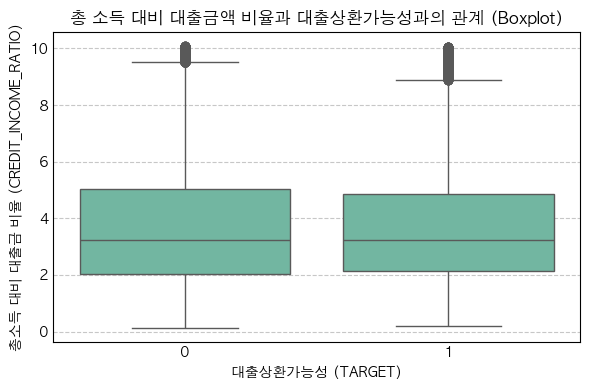

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='TARGET', y='CREDIT_INCOME_RATIO')
plt.title('총 소득 대비 대출금액 비율과 대출상환가능성과의 관계 (Boxplot)')
plt.xlabel('대출상환가능성 (TARGET)')
plt.ylabel('총소득 대비 대출금 비율 (CREDIT_INCOME_RATIO)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* [해석]
    * 중앙값의 차이는 상환 불가능 그룹(TARGET=1)의 중앙값이 상환 가능 그룹(TARGET=0)보다 약간 더 높음.
        * 이는 총소득 대비 대출금 비율이 높을수록 상환 불가능할 가능성이 증가할 수 있음을 시사.
    * 두 그룹 모두 대출금 비율이 2~5 사이에 데이터가 집중되어 있으며, 큰 차이는 관찰되지 않음.
    * 대출 상환 가능성(TARGET=0)은 총소득 대비 대출금 비율이 낮을수록 더 높아질 가능성이 있음.
    * 대출 상환 불가능성(TARGET=1)은 총소득 대비 대출금 비율이 높은 데이터에서 더 자주 나타날 가능성이 있음.
    * 두 그룹 간의 차이는 존재하지만, 명확한 경계(Threshold)는 발견되지 않으며, 일부 구간에서는 분포가 겹침.
        * 두 그룹의 중앙값 차이가 통계적으로 유의미한지 검증이 필요함

##### 2.1.2.9 직업유형(OCCUPATION_TYPE) - 결측치 처리 여부 결정 (UNKOWN)

In [26]:
df['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      88366
Laborers                 51609
Sales staff              29911
Core staff               24785
Drivers                  17226
Managers                 16592
High skill tech staff    10334
Accountants               8684
Medicine staff            7789
Security staff            6268
Cooking staff             5567
Cleaning staff            4351
Private service staff     2436
Low-skill Laborers        1992
Waiters/barmen staff      1262
Secretaries               1183
Realty agents              697
HR staff                   505
IT staff                   458
Name: count, dtype: int64

* NaN 의 비율이 매우 크므로 정보손실 가능성이 있어 UnKnown으로 매핑후 분석에 활용
* 직업을 직업군으로 매핑

In [27]:
occupation_mapping = {
    'High skill tech staff': 'Skilled Professionals',
    'Accountants': 'Skilled Professionals',
    'IT staff': 'Skilled Professionals',
    'Managers': 'Skilled Professionals',
    'Medicine staff': 'Service Staff',
    'Private service staff': 'Service Staff',
    'Waiters/barmen staff': 'Service Staff',
    'Secretaries': 'Office Staff',
    'HR staff': 'Office Staff',
    'Realty agents': 'Office Staff',
    'Laborers': 'Labor Workers',
    'Drivers': 'Labor Workers',
    'Cooking staff': 'Labor Workers',
    'Cleaning staff': 'Labor Workers',
    'Low-skill Laborers': 'Labor Workers',
    'Security staff': 'Labor Workers',
    'Sales staff': 'Sales Staff',
    'Core staff': 'Core Staff',
    # NaN 처리
    None: 'Unknown',
    # 기타 소수
    'Other': 'Other'
}
df['OCCUPATION_GROUP'] = df['OCCUPATION_TYPE'].map(occupation_mapping).fillna('Unknown')


* 직업군(OCCUPATION_GROUP)과 대출상환가능성(TARGET)변수의 비율 시각화
    * Mosaic plot
        * 직업군의 비율차이를 명확히 확인하기 위해 오버샘플링을 통한 균형 데이터프레임 생성 후 시각화하여 확인

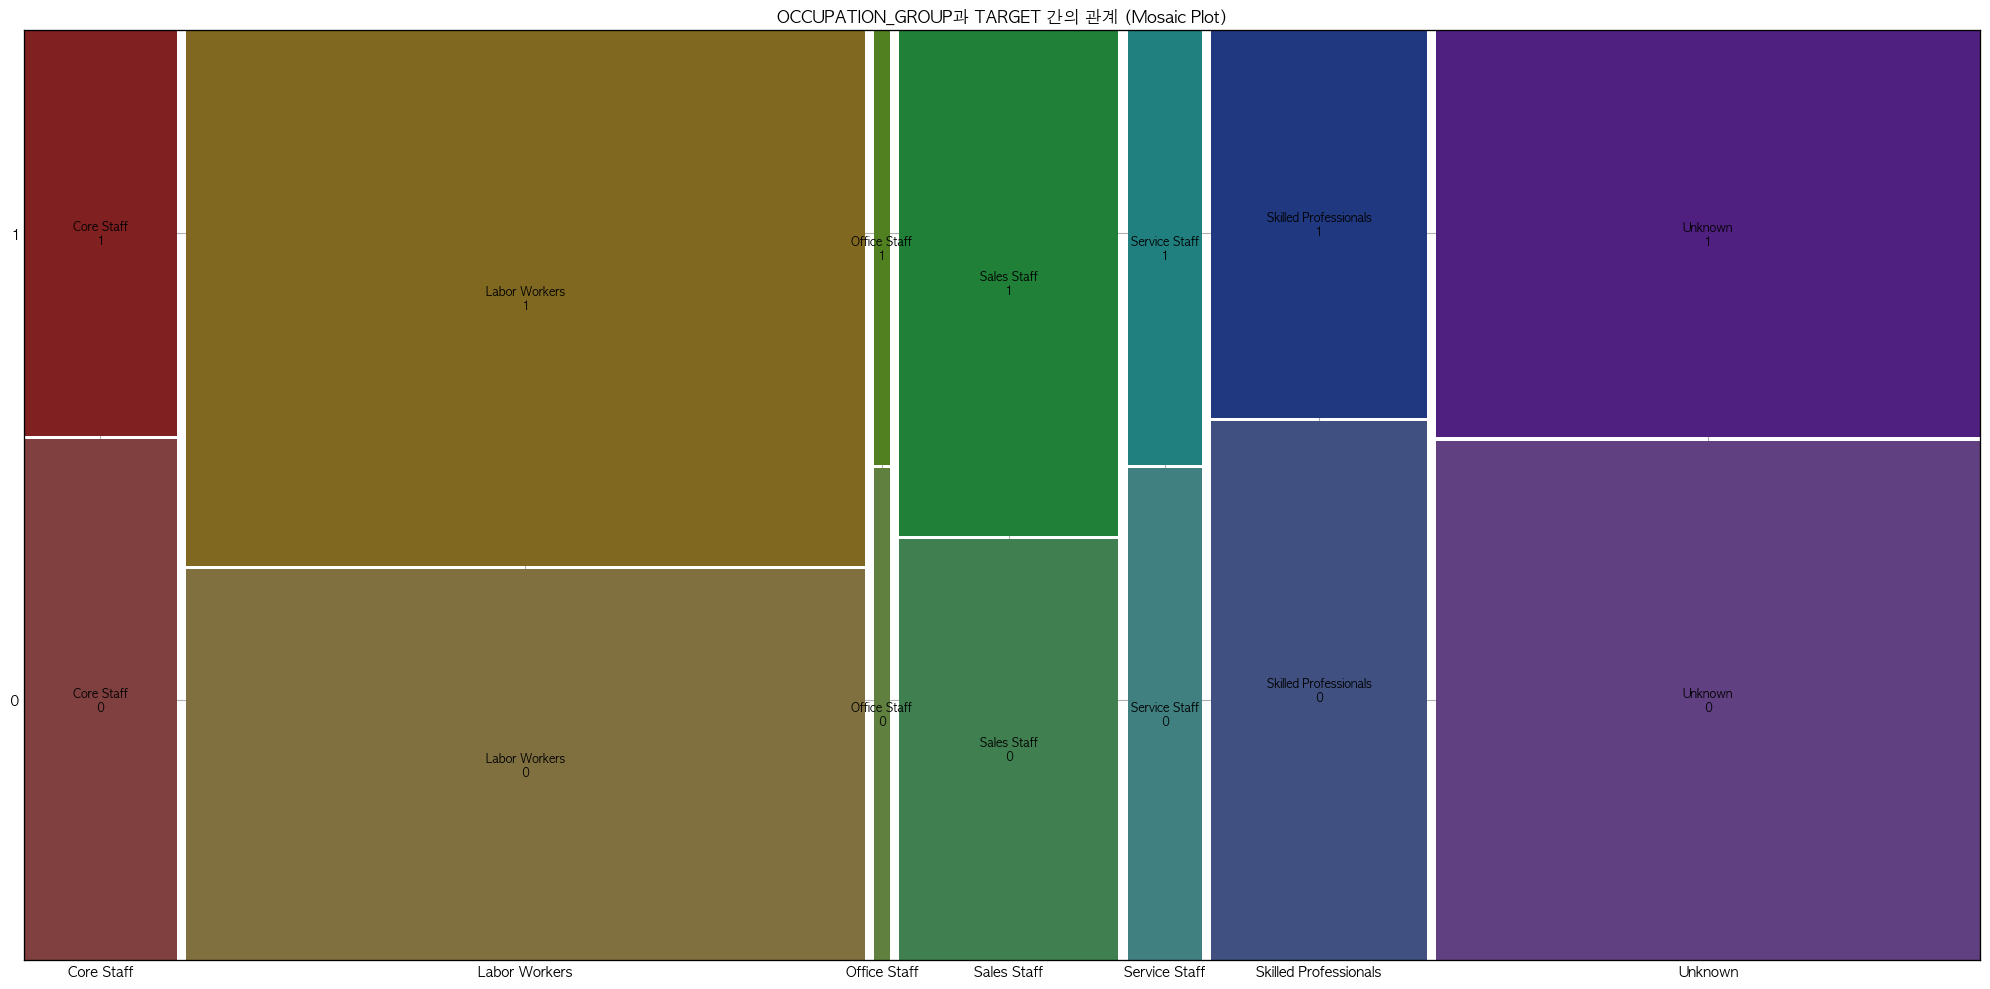

In [28]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
# 언더샘플링 또는 오버샘플링
# 소수 클래스 추출
minority_class = df[df['TARGET'] == 1]
majority_class = df[df['TARGET'] == 0]

# 오버샘플링
minority_oversampled = resample(minority_class, 
                                replace=True,    # 복원 추출
                                n_samples=len(majority_class), # 다수 클래스와 동일한 크기로
                                random_state=42)

# 균형 데이터프레임 생성
balanced_df = pd.concat([majority_class, minority_oversampled]).reset_index(drop=True)

# Mosaic Plot을 그리기 위한 데이터 준비
mosaic_data = balanced_df.groupby(['OCCUPATION_GROUP', 'TARGET']).size()

# Mosaic Plot 그리기
plt.rcParams['figure.figsize'] = [20, 10]
mosaic(mosaic_data, title='OCCUPATION_GROUP과 TARGET 간의 관계 (Mosaic Plot)')
plt.tight_layout()
plt.show()



* [해석]
    * 리스크가 높은 직업군 : Labor Workers와 Service Staff는 상환 불가능 비율이 높아 대출 리스크가 큰 직업군으로 분류 가능.
    * 안정적인 직업군 : Skilled Professionals, Sales Staff는 상환 가능 비율이 높아 안정적인 직업군으로 보임.

#### 2.1.3 데이터 탐색을 통한 해석
* EDA를 통해 독립변수와 종속변수 간의 관계를 탐색할 수는 있지만, 다음과 같은 이유로 관계를 명확히 설명할 수 없습니다
    * 인과관계 파악 불가
    * 데이터 편향 및 잠재적 변수 존재
    * 복잡한 상호작용 및 비선형성
    * 통계적 검증 부족
* 따라서, 추가적인 분석(예: 회귀 분석, 통계적 검정)을 통한 관계를 파악해보아야 함

### 2.2 데이터 전처리

#### 2.2.1 파생변수 생성

* 경제활동여부 변수 생성

In [29]:

# 그룹화 기준 설정
economic_activity_group = ['Working', 'Commercial associate', 'State servant', 'Businessman']
non_economic_activity_group = ['Pensioner', 'Student', 'Unemployed', 'Maternity leave']

# 경제활동 여부를 1, 0으로 매핑
df['IS_ACTIVITY_GROUP'] = df['NAME_INCOME_TYPE'].apply(
    lambda x: 1 if x in economic_activity_group else 0
)

# 결과 출력
print(df['IS_ACTIVITY_GROUP'].value_counts())

IS_ACTIVITY_GROUP
1    228669
0     51346
Name: count, dtype: int64


* 교육 등급 변수 생성

In [30]:
# 교육 등급 매핑
education_mapping = {
    "Lower secondary": 1,                # 낮은 중등교육
    "Secondary / secondary special": 2, # 중등교육/특별 중등교육
    "Incomplete higher": 3,             # 고등교육 미완료
    "Higher education": 4,              # 고등교육 완료
    "Academic degree": 5                # 학위 소지
}

# EDUCATION_LEVEL 변수 생성
df["EDUCATION_LEVEL"] = df["NAME_EDUCATION_TYPE"].map(education_mapping)

* 결혼 여부 변수 생성

In [31]:
# 결혼 여부를 나타내는 이진 변수 생성
df['IS_MARRIED'] = df['NAME_FAMILY_STATUS'].apply(
    lambda x: 1 if x in ['Married', 'Civil marriage'] else 0
)
# 결과 확인
print(df['IS_MARRIED'].value_counts())

IS_MARRIED
1    203064
0     76951
Name: count, dtype: int64


* 성별 이상치 처리

In [32]:
# 'XNA'를 최대 빈도 범주로 대체
max_freq_category = df['CODE_GENDER'].value_counts().idxmax()
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', max_freq_category)

### 2.2 다중공선성(VIF)

* 다중공선성을 제거해야 하는 이유
    * 변수 간 강한 상관관계: 비슷한 정보를 가진 변수가 많으면 모델이 헷갈려 변수 중요도를 정확히 판단하지 못함.
    * 모델 해석 어려움: 다중공선성으로 회귀 계수가 왜곡되어 잘못된 결론을 초래할 수 있음.
    * 모델 안정성 저하: 데이터 변화에 따라 결과가 크게 흔들려 예측이 불안정해짐.
    * 계산 비효율성: 불필요한 중복 변수로 모델 훈련 속도가 느려지고 복잡도가 증가함.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

use_cols = ['AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 
            'FLAG_OWN_REALTY','FLAG_OWN_CAR', 'CREDIT_INCOME_RATIO', 'IS_ACTIVITY_GROUP',
            'AGE', 'CODE_GENDER', 'IS_MARRIED', 'CNT_CHILDREN', 'EDUCATION_LEVEL', 'OCCUPATION_GROUP']

df_cleaned = df[use_cols].copy()

# VIF 계산 함수 (원핫 인코딩 없이)
def calculate_vif_no_onehot(dataframe):
    # 숫자 데이터만 선택
    numeric_df = dataframe.select_dtypes(include=['number'])
    
    vif_data = pd.DataFrame()
    vif_data['Variable'] = numeric_df.columns
    vif_data['VIF'] = [
        variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])
    ]
    return vif_data

# VIF 계산
vif_report = calculate_vif_no_onehot(df_cleaned)

# VIF 10 초과 변수 필터링
high_vif_variables = vif_report[vif_report['VIF'] > 10]

# 결과 출력
print("VIF > 10인 변수들:")
print(high_vif_variables)


VIF > 10인 변수들:
               Variable          VIF
1            FLAG_MOBIL    86.861628
2        FLAG_EMP_PHONE  5721.302901
3  REGION_RATING_CLIENT    19.073122
6     IS_ACTIVITY_GROUP  5718.530121
7                   AGE    25.046262


* VIF가 매우 높은 FLAG_EMP_PHONE(고객이 업무용 전화를 제공했는지 여부), IS_ACTIVITY_GROUP(경제활동여부), FLAG_MOBILE(고객이 휴대전화를 제공했는지 여부), REGION_RATING_CLIENT(고객이 거주하는 지역의 평가 등급) 을 제외하고 다시 확인해보자
    * AGE는 도메인적으로 분석이 필요함으로 다른 변수들을 제거하고도 다중공선성이 존재하는지 확인해본다.

In [34]:
use_cols = ['AMT_INCOME_TOTAL', 'REG_REGION_NOT_WORK_REGION', 
            'FLAG_OWN_REALTY','FLAG_OWN_CAR', 'CREDIT_INCOME_RATIO',
            'AGE', 'CODE_GENDER', 'IS_MARRIED', 'CNT_CHILDREN', 'EDUCATION_LEVEL', 'OCCUPATION_GROUP']

df_cleaned = df[use_cols].copy()

# VIF 계산 함수 (원핫 인코딩 없이)
def calculate_vif_no_onehot(dataframe):
    # 숫자 데이터만 선택
    numeric_df = dataframe.select_dtypes(include=['number'])
    
    vif_data = pd.DataFrame()
    vif_data['Variable'] = numeric_df.columns
    vif_data['VIF'] = [
        variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])
    ]
    return vif_data

# VIF 계산
vif_report = calculate_vif_no_onehot(df_cleaned)

# VIF 10 초과 변수 필터링
high_vif_variables = vif_report[vif_report['VIF'] > 10]

# 결과 출력
print("VIF > 10인 변수들:")
print(high_vif_variables)

VIF > 10인 변수들:
Empty DataFrame
Columns: [Variable, VIF]
Index: []


### 2.2 가설 검정

#### 2.2.1 연구문제 정의
* 고객의 경제적 특성이 대출 상환 여부에 영향을 미치는가?
    * 고객의 소득 수준과 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
    * 자산(부동산, 차량) 보유 여부와 대출 상환 가능성간에 유의미한 상관관계가 있는가?
    * 고객의 총 소득 대비 / 부채비율이 대출 상환 가능성에 유의미한 상관관계가 있는가?
* 고객의 개인적 특성이 대출 상환 여부에 영향을 미치는가?
    * 나이와 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
    * 성별과 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
    * 결혼유무, 자녀수와 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
    * 학력수준과 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
    * 직업과 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
* 조절변수
    * 대출 조건(독립변수)와 상환성공 가능성(종속변수)간 관계에 영향을 줄 수 있는 변수
        * 고객 주소와 직장 주소 일치 여부 - REG_REGION_NOT_WORK_REGION
* 통제변수
    * 사전에 고려했던 변수들은 다중공선성에 의해 삭제됨

* 주요용어 
    * 통제변수
        * 주요 독립변수와 종속변수 간의 관계를 명확히 하기 위해 일정하게 유지하거나 통제하는 변수
        * 외부 요인으로 작용해 결과를 왜곡할 수 있는 영향을 제거하려는 목적
    * 조절변수
        * 독립변수와 종속변수 간의 관계를 조절하거나 변화시키는 변수
    * 상호작용항
        * 두개 이상의 독립변수 간의 상호작용 효과를 포함시키기 위해 사용
        * 이는 독립변수들이 단독으로 종속변수에 영향을 미치는 것 외에, 서로 결합되어 함께 종속변수에 영향을 미칠 가능성을 반영
    * Coef (Coefficient, 회귀계수) 
        * 독립변수(원인)가 종속변수(결과)에 미치는 영향의 크기와 방향
        * 예를 들어, coef = 2라면, 독립변수가 1 단위 증가할 때 종속변수가 평균적으로 2만큼 증가
    * p-value (유의확률)
        * 해당 독립변수가 종속변수에 미치는 영향(coef)이 통계적으로 유의미한지를 평가
        * 낮을수록 해당 독립변수와 종속변수 사이의 관계가 유의미할 가능성이 높다.
    * Pseudo R-squared 
        * 회귀 모델에서 모형의 적합도를 평가하는 지표
        * 값이 높을수록 모델이 데이터의 변동성을 잘 설명
    * Log-Likelihood
        * 값이 클수록 모델이 데이터를 잘 설명한다는 의미
        * 계산을 간편하게 하고, 최적화 알고리즘(예: 경사 하강법)에서 사용하기 좋게 변환한 값.
    * LLR p-value
        *  더 복잡한 모델이 단순한 모델보다 데이터를 더 잘 설명하는지를 평가
    * 절편(intercept)
        * 회귀 분석에서 종속변수(예측값)가 독립변수가 모두 0일 때 가지는 값
    * const
        *  상수항(intercept) 또는 절편을 의미
        * 상수항이 없으면 독립 변수들의 선형 결합으로 종속 변수를 충분히 설명하지 못할 수 있습니다.
        * 상수항을 포함하면 모델의 편향(bias)을 보정할 수 있습니다

#### 2.2.2 가설검정 1. 고객의 경제적 특성이 대출 상환 여부에 영향을 미치는가?

In [35]:
# 필요한 컬럼만 추출
columns_to_keep = [
     'AMT_INCOME_TOTAL',  'REG_REGION_NOT_WORK_REGION', 'FLAG_OWN_REALTY',  'FLAG_OWN_CAR', 
    'CREDIT_INCOME_RATIO'
]
df_an = df[columns_to_keep].dropna()

##### 2.2.2.1 가설검정 1에 대한 로지스틱 회귀검정

* Step 1. 가설검정에 활용할 모든 독립변수, 모든 독립변수 상호작용항적용 모델

In [36]:
import pandas as pd
import statsmodels.api as sm

#df_clean = pd.get_dummies(df_an, columns=['CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR', 'OCCUPATION_GROUP'], drop_first=True)
df_clean = pd.get_dummies(df_an, columns=['FLAG_OWN_REALTY', 'FLAG_OWN_CAR'], drop_first=True)

# 조절변수와 주요 변수의 상호작용 항 추가
df_clean['AMT_INCOME_TOTAL_INTERACTION'] = df_clean['AMT_INCOME_TOTAL'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['CREDIT_INCOME_RATIO_INTERACTION'] = df_clean['CREDIT_INCOME_RATIO'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['FLAG_OWN_REALTY_Y_INTERACTION'] = df_clean['FLAG_OWN_REALTY_Y'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['FLAG_OWN_CAR_Y_INTERACTION'] = df_clean['FLAG_OWN_CAR_Y'] * df_clean['REG_REGION_NOT_WORK_REGION']


# 데이터 타입 확인 후 변환

for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        # bool 타입을 int로 변환
        df_clean[col] = df_clean[col].astype(int)

    #print(df_clean[col].value_counts())
    
X = df_clean.copy()


# 종속변수 정의
y = df['TARGET']

# 로지스틱 회귀 모델 적합
X =sm.add_constant(X)
model = sm.Logit(y, X)

result = model.fit(maxiter=1000, disp=False)

# 결과 출력
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               280015
Model:                          Logit   Df Residuals:                   280005
Method:                           MLE   Df Model:                            9
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.001588
Time:                        18:18:18   Log-Likelihood:                -79271.
converged:                       True   LL-Null:                       -79398.
Covariance Type:            nonrobust   LLR p-value:                 3.450e-49
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.1514      0.027    -80.696      0.000      -2.204      -2.099
AMT_INCOME_TOTAL                -8.914e-07   1.18e-07     -7.531    

* 무의미한 변수
    * CREDIT_INCOME_RATIO_INTERACTION, FLAG_OWN_REALTY_Y_INTERACTION 변수는 p-value >= 유의수준 0.05이므로 통계적으로 유의하지 않다.

* Step 2. 가설검정에 활용할 Step1에서 유의미한 변수들만 투입한 모델

In [37]:

df_clean = pd.get_dummies(df_an, columns=['FLAG_OWN_REALTY', 'FLAG_OWN_CAR'], drop_first=True)

# 모델 성능 향상을 위해 로그 변환으로 스케일을 조정.
df_clean['AMT_INCOME_TOTAL'] = np.log(df_clean['AMT_INCOME_TOTAL'] + 1)

# 조절변수와 주요 변수의 상호작용 항 추가
df_clean['AMT_INCOME_TOTAL_INTERACTION'] = df_clean['AMT_INCOME_TOTAL'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['FLAG_OWN_CAR_Y_INTERACTION'] = df_clean['FLAG_OWN_CAR_Y'] * df_clean['REG_REGION_NOT_WORK_REGION']


# 데이터 타입 확인 후 변환

for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        # bool 타입을 int로 변환
        df_clean[col] = df_clean[col].astype(int)

    #print(df_clean[col].value_counts())
    
X = df_clean.copy()


# 종속변수 정의
y = df['TARGET']

# 로지스틱 회귀 모델 적합
X =sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit(maxiter=1000, disp=False)

# 결과 출력
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               280015
Model:                          Logit   Df Residuals:                   280007
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                0.001358
Time:                        18:18:19   Log-Likelihood:                -79290.
converged:                       True   LL-Null:                       -79398.
Covariance Type:            nonrobust   LLR p-value:                 5.624e-43
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.2265      0.205     -5.972      0.000      -1.629      -0.824
AMT_INCOME_TOTAL                -0.0892      0.017     -5.189      0.000     

* Pseudo R-squared: 0.001358로 매우 낮습니다. 이는 이 모델이 데이터 변동성을 설명하는 데에 큰 기여를 하지 못한다는 것을 의미하기는 하나
LLR p-value값은 5.624e-43로, 모델 자체는 통계적으로 유의미합니다. 따라서 이에 대한 가설 검정 결과를 해석해보겠습니다.

##### 2.2.2.2 가설검정 결과 요약 (Step 2 모델 해석)
* 메인가설 : 고객의 경제적 특성이 대출 상환 여부에 영향을 미치는가?
    * 귀무가설 : 경제적 특성과 대출 상환 여부는 통계적으로 유의한 관계가 없다.
    * 대립가설 : 경제적 특성이 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
    * 모든 독립변수의 p-value값이 대부분 유의수준 0.05이하로 나타났으며, 이는 고객의 경제적 특성이 대출 상환 여부에 통계적으로 유의미한 영향을 미친다는 것을 나타냅니다.
    * 즉, 귀무가설을 기각합니다. 고객의 경제적 특성은 대출 상환 여부에 유의미한 영향을 미칩니다. 
* 서브가설 1 : 고객의 소득 수준과 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
    * 귀무가설 : 소득 수준과 대출 상환 여부는 통계적으로 유의한 관계가 없다.
    * 대립가설 : 소득 수준이 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
    * 총소득(AMT_INCOME_TOTAL) : Coef가 -0.0892 음수로 총 소득 증가 시 대출 상환 실패 가능성이 감소합니다.
      * p-value는 0.000으로 통계적으로 매우 유의미합니다.
    * 즉, 귀무가설을 기각합니다. 고객의 소득 수준은 대출 상환 가능성과 유의미한 상관관계가 있습니다. 
* 서브가설 2 : 자산(부동산, 차량) 보유 여부와 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
    * 귀무가설 : 자산 보유 여부와 대출 상환 여부는 통계적으로 유의한 관계가 없다.
    * 대립가설 : 자산 보유 여부가 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
    * 부동산 보유여부(FLAG_OWN_REALTY_Y) : Coef가 -0.0569로 음수, 부동산 보유 시 대출 상환 실패 가능성이 감소합니다.
      * p-value가 0.000으로 통계적으로 매우 유의미합니다.
      * 부동산을 보유한 고객은 대출 상환 실패 가능성이 더 낮습니다.
    * 차량 보유여부(FLAG_OWN_CAR_Y) : Coef가 -0.1306로 음수, 차량 보유 시 대출 상환 실패 가능성이 감소합니다.
      * p-value가 0.000으로 통계적으로 매우 유의미합니다.
      * 차량을 보유한 고객은 대출 상환 실패 가능성이 더 낮습니다.
    * 즉,  귀무가설을 기각합니다. 부동산 및 차량 보유 여부는 대출 상환 가능성과 유의미한 상관관계가 있습니다.
* 서브가설 3 : 고객의 총 소득 대비 부채비율이 대출 상환 가능성에 유의미한 상관관계가 있는가?
    * 귀무가설 : 고객 총 소득 대비 부채비율과 대출 상환 여부는 통계적으로 유의한 관계가 없다.
    * 대립가설 : 고객 총 소득 대비 부채비율이 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
    * 소득 대비 부채비율(CREDIT_INCOME_RATIO) : Coef가 -0.0159로 음수, 부채비율 증가 시 대출 상환 실패 가능성이 증가합니다.
      * p-value가 0.000으로 통계적으로 매우 유의미합니다.
    * 즉 귀무가설을 기각합니다. 고객의 총 소득 대비 부채비율은 대출 상환 가능성과 유의미한 상관관계가 있습니다.

* 상호작용항에 대한 해설
    * 차소유여부와 거주지/근무지 동일여부와의 상호작용(FLAG_OWN_CAR_Y_INTERACTION)은 coef가   -0.1906 음수로 대출 불가능성을 감소시키는 경향이 있습니다.
        * p-value가 0.004으로 통계적으로 매우 유의미합니다.
        * 차 소유여부와 거주지/근무지 불일치여부간의 상호작용 효과로, 이 상호작용은 대출상환불가능성을 더 크게 감소시키는 방향으로 작용합니다.
     * 총수입과 거주지/근무지 불일치여부와의 상호작용(AMT_INCOME_TOTAL_INTERACTION)은 coef가  -0.2598 음수로 대출 불가능성을 감소시키는 경향이 있습니다.
        * p-value가 0.003으로 통계적으로 매우 유의미합니다.
        * 총 수입과 거주지/근무지 불일치여부간의 상호작용 효과로, 이 상호작용은 대출상환불가능성을 더 크게 감소시키는 방향으로 작용합니다.

##### 2.2.2.3 예측

In [38]:
# 테스트 데이터: X와 동일한 열을 가진 하나의 데이터 생성
test_data = {
    'AMT_INCOME_TOTAL': [np.log(400000 + 1)],  # 로그 변환된 소득 (예: 40만 달러)
    'REG_REGION_NOT_WORK_REGION': [1],  # 지역 이동 여부 (1: 이동, 0: 이동하지 않음)
    'FLAG_OWN_REALTY_Y': [1],  # 부동산 소유 여부 (1: 소유, 0: 소유하지 않음)
    'FLAG_OWN_CAR_Y': [0],  # 자동차 소유 여부 (1: 소유, 0: 소유하지 않음)
    'FLAG_OWN_CAR_Y_INTERACTION': [0]  # 상호작용 항 (자동차 소유 여부 * 지역 이동 여부)
}
# 데이터프레임 생성
df_test_single = pd.DataFrame(test_data)

# 훈련 데이터(X)와 동일한 열로 정렬 (누락된 열은 0으로 채움)
df_test_single_aligned = pd.DataFrame(columns=X.columns)  # X의 열 구조를 기반으로 생성
df_test_single_aligned = pd.concat([df_test_single_aligned, df_test_single], ignore_index=True)
df_test_single_aligned = df_test_single_aligned.fillna(0)  # 누락된 값은 0으로 채움

# 예측 수행
pred = result.get_prediction(exog=df_test_single_aligned)
summary = pred.summary_frame(alpha=0.05)

print(summary)

   predicted        se  ci_lower  ci_upper
0   0.898089  0.102665  0.494413  0.987565


* 샘플데이터인 총소득이 40만달러이고 거주지/근무지가 일치하지 않으며, 부동산을 소유하고, 차를 소유하지 않은 고객의 대출 불가능성 확률은 89.8%로 높은 편입니다.
* 표준 오차 값(0.1027)이 비교적 작으므로, 모델이 예측값(89.8%)에 대해 신뢰할 만하다고 해석할 수 있습니다. 표준 오차가 작으면 모델의 안정성이 좋고 데이터가 적절히 피팅되었음을 시사합니다.
* 95% 신뢰구간이 [0.494, 0.988]로 예측값이 이 범위 안에 있을 확률이 95%임을 의미합니다. 신뢰구간이 비교적 넓은 편이므로 추가적인 데이터나 변수 개선을 통해 모델의 예측 정확도를 높이는 작업은 필요해보입니다.

* 상호작용(교호작용) 시각화

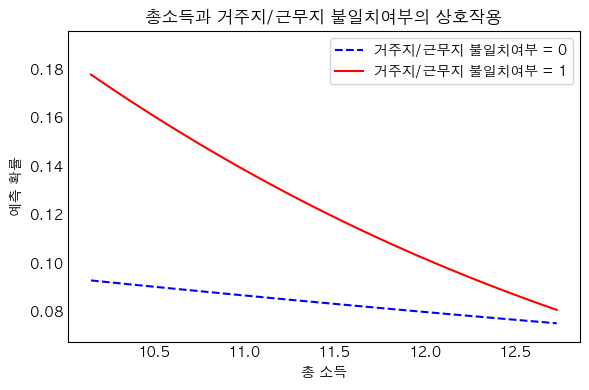

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# AGE 및 REG_REGION_NOT_WORK_REGION 값을 기반으로 예측값 생성
def plot_interaction_effect(ax, data, base_var, interaction_var, interaction_label, xlabel, ylabel, title):
    # base_var의 범위를 생성
    base_range = np.linspace(data[base_var].min(), data[base_var].max(), 100)
    interaction_levels = [0, 1]  # REG_REGION_NOT_WORK_REGION의 두 값을 시뮬레이션

    predictions = []
    for level in interaction_levels:
        # 모델에 사용된 모든 열을 포함한 temp_data 생성
        temp_data = pd.DataFrame(columns=data.columns)
        
        # base_var와 interaction_var 설정
        temp_data[base_var] = base_range
        temp_data['REG_REGION_NOT_WORK_REGION'] = level
        temp_data[interaction_var] = temp_data[base_var] * level  # 상호작용 항 생성

        # 나머지 변수들은 평균값으로 채움
        for col in data.columns:
            if col not in [base_var, 'REG_REGION_NOT_WORK_REGION', interaction_var]:
                temp_data[col] = data[col].mean()

        # 결측값 처리
        temp_data = temp_data.fillna(method='ffill')

        # 열 순서 맞추기 (모델의 입력 변수 순서와 동일하게)
        temp_data = temp_data[data.columns]

        # 예측값 계산
        pred = result.predict(temp_data)
        predictions.append(pred)

    # 시각화
    ax.plot(base_range, predictions[0], label=f'{interaction_label} = 0', color='blue', linestyle='--')
    ax.plot(base_range, predictions[1], label=f'{interaction_label} = 1', color='red', linestyle='-')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid()

    # y축 범위 조정
    y_min = min(predictions[0].min(), predictions[1].min()) * 0.9
    y_max = max(predictions[0].max(), predictions[1].max()) * 1.1
    ax.set_ylim(y_min, y_max)

# 전체 그래프 레이아웃 설정
fig, axes = plt.subplots(1, 1, figsize=(6, 4))

# 각 상호작용 효과를 플롯
plot_interaction_effect(
    ax=axes,
    data=X,
    base_var='AMT_INCOME_TOTAL',
    interaction_var='AMT_INCOME_TOTAL_INTERACTION',
    interaction_label='거주지/근무지 불일치여부',
    xlabel='총 소득',
    ylabel='예측 확률',
    title='총소득과 거주지/근무지 불일치여부의 상호작용'
)


# 그래프 레이아웃 정리 및 표시
plt.tight_layout()
plt.show()


* 총소득과 거주지/근무지 불일치 여부 간의 상호작용이 TARGET (대출 상환 불가능성)에 미치는 영향을 보여줍니다
* 거주지/근무지 불일치 여부는 총소득이 상환 불가능성에 미치는 영향을 조정하는 중요한 변수입니다.
* 동일한 소득 수준에서도, 거주지와 근무지가 불일치한 고객은 상환 불가능성이 더 높습니다. 특히 총 소득 수준이 낮을때 거주지와 근무지가 불일치한 고객의 상환불가능성이 더 높습니다.
* 소득 수준이 낮은 고객에게는 거주지와 근무지 불일치로 인한 비용 증가가 소득 대비 높은 비율을 차지합니다. 이는 상환 불가능성을 더욱 악화시킵니다.
* 저소득층 고객에게 거주지와 근무지의 불일치는 추가적인 재정적 압박으로 작용하여 대출 상환 능력을 저하시킵니다. 특히, 소득이 낮을수록 이러한 부담은 전체 소득 대비 비례적으로 커지며, 상환 불가능성을 증가시킬 수 있습니다. 

#### 2.2.3 가설검정 2. 고객의 개인적 특성이 대출 상환 여부에 영향을 미치는가?

##### 2.2.3.1 가설검정 2에 대한 로지스틱 회귀검정

In [40]:
# 필요한 컬럼만 추출
columns_to_keep = [
    'REG_REGION_NOT_WORK_REGION',  'AGE', 'CODE_GENDER', 'IS_MARRIED', 'CNT_CHILDREN', 'EDUCATION_LEVEL','OCCUPATION_GROUP'
]

df_an = df[columns_to_keep].dropna()

* Step 1. 가설검정에 활용할 모든 독립변수, 모든 독립변수 상호작용항적용 모델

In [41]:
import pandas as pd
import statsmodels.api as sm

df_clean = pd.get_dummies(df_an, columns=['CODE_GENDER',  'OCCUPATION_GROUP'], drop_first=True)

# 조절변수와 주요 변수의 상호작용 항 추가
df_clean['AGE_INTERACTION'] = df_clean['AGE'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['IS_MARRIED_INTERACTION'] = df_clean['IS_MARRIED'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['CNT_CHILDREN_INTERACTION'] = df_clean['CNT_CHILDREN'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['EDUCATION_LEVEL_INTERACTION'] = df_clean['EDUCATION_LEVEL'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['CODE_GENDER_M_INTERACTION'] = df_clean['CODE_GENDER_M'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['OCCUPATION_GROUP_LW_INTERACTION'] = df_clean['OCCUPATION_GROUP_Labor Workers'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['OCCUPATION_GROUP_OS_INTERACTION'] = df_clean['OCCUPATION_GROUP_Office Staff'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['OCCUPATION_GROUP_Sales_INTERACTION'] = df_clean['OCCUPATION_GROUP_Sales Staff'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['OCCUPATION_GROUP_Service_INTERACTION'] = df_clean['OCCUPATION_GROUP_Service Staff'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['OCCUPATION_GROUP_SP_INTERACTION'] = df_clean['OCCUPATION_GROUP_Skilled Professionals'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['OCCUPATION_GROUP_U_INTERACTION'] = df_clean['OCCUPATION_GROUP_Unknown'] * df_clean['REG_REGION_NOT_WORK_REGION']

# 데이터 타입 확인 후 변환

for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        # bool 타입을 int로 변환
        df_clean[col] = df_clean[col].astype(int)
X = df_clean.copy()

# 종속변수 정의
y = df['TARGET']

# 로지스틱 회귀 모델 적합
X =sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit(maxiter=1000, disp=False)

# 결과 출력
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               280015
Model:                          Logit   Df Residuals:                   279991
Method:                           MLE   Df Model:                           23
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02642
Time:                        18:18:21   Log-Likelihood:                -77300.
converged:                       True   LL-Null:                       -79398.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.9003      0.050    -17.846      0.000      -0.999      -0.801
REG_REGION_NOT_WORK_REGION                -0.48

* 모델은  설명력(Pseudo R-squared : 0.02642)이 낮아 실제로 종속변수 예측 성능이 제한적일 가능성은 있으나 통계적으로 유의미 합니다.(LLR p-value: 0.000)
* 유의미하지 않은 변수들(p-value > 0.05)을 제거한 후 다시 해석해보자.
    * CNT_CHILDREN(0.055), OCCUPATION_GROUP_Office Staff(p-value: 0.135),OCCUPATION_GROUP_Service Staff(p-value : 0.136), OCCUPATION_GROUP_Skilled Professionals(p-value:0.171), IS_MARRIED_INTERACTION(p-value: 0.475), CODE_GENDER_M_INTERACTION(p-value : 0.133), OCCUPATION_GROUP_LW_INTERACTION(p-value: 0.874), OCCUPATION_GROUP_OS_INTERACTION(p-value:  0.860),OCCUPATION_GROUP_Sales_INTERACTION(p-value: 0.591), OCCUPATION_GROUP_SP_INTERACTION(p-value : 0.378), 
    OCCUPATION_GROUP_Service_INTERACTION(p-value: 0.957), OCCUPATION_GROUP_U_INTERACTION(p-value :0.639)

* Step 2. 가설검정에 활용할 Step1에서 유의미한 변수들만 투입한 모델

In [42]:
import pandas as pd
import statsmodels.api as sm

df_clean = pd.get_dummies(df_an, columns=['CODE_GENDER',  'OCCUPATION_GROUP'], drop_first=True)


# 조절변수와 주요 변수의 상호작용 항 추가
df_clean['AGE_INTERACTION'] = df_clean['AGE'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['CNT_CHILDREN_INTERACTION'] = df_clean['CNT_CHILDREN'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['EDUCATION_LEVEL_INTERACTION'] = df_clean['EDUCATION_LEVEL'] * df_clean['REG_REGION_NOT_WORK_REGION']


df_clean = df_clean.drop(columns=['CNT_CHILDREN', 'OCCUPATION_GROUP_Office Staff', 'OCCUPATION_GROUP_Service Staff', 'OCCUPATION_GROUP_Skilled Professionals'])

for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        # bool 타입을 int로 변환
        df_clean[col] = df_clean[col].astype(int)
X = df_clean.copy()

# 종속변수 정의
y = df['TARGET']

# 로지스틱 회귀 모델 적합
X =sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit(maxiter=1000, disp=False)

# 결과 출력
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               280015
Model:                          Logit   Df Residuals:                   280003
Method:                           MLE   Df Model:                           11
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02631
Time:                        18:18:22   Log-Likelihood:                -77309.
converged:                       True   LL-Null:                       -79398.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9094      0.044    -20.791      0.000      -0.995      -0.824
REG_REGION_NOT_WORK_REGION        -0.3978      0.163     -2.436      0.

* 유의하지 않은 변수(p-value < 0.05)
    * AGE_INTERACTION(p-value:0.064)

* Step 3. 가설검정에 활용할 Step2에서 유의미한 변수들만 투입한 모델

In [43]:
import pandas as pd
import statsmodels.api as sm

df_clean = pd.get_dummies(df_an, columns=['CODE_GENDER',  'OCCUPATION_GROUP'], drop_first=True)


# 조절변수와 주요 변수의 상호작용 항 추가
df_clean['CNT_CHILDREN_INTERACTION'] = df_clean['CNT_CHILDREN'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['EDUCATION_LEVEL_INTERACTION'] = df_clean['EDUCATION_LEVEL'] * df_clean['REG_REGION_NOT_WORK_REGION']


df_clean = df_clean.drop(columns=['CNT_CHILDREN', 'OCCUPATION_GROUP_Office Staff', 'OCCUPATION_GROUP_Service Staff', 'OCCUPATION_GROUP_Skilled Professionals'])

for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        # bool 타입을 int로 변환
        df_clean[col] = df_clean[col].astype(int)
X = df_clean.copy()

# 종속변수 정의
y = df['TARGET']

# 로지스틱 회귀 모델 적합
X =sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit(maxiter=1000, disp=False)

# 결과 출력
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               280015
Model:                          Logit   Df Residuals:                   280004
Method:                           MLE   Df Model:                           10
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02629
Time:                        18:18:23   Log-Likelihood:                -77310.
converged:                       True   LL-Null:                       -79398.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9216      0.043    -21.311      0.000      -1.006      -0.837
REG_REGION_NOT_WORK_REGION        -0.1590      0.099     -1.599      0.

* 유의미하지 않은 변수들 제거(p-value < 0.05)
    * REG_REGION_NOT_WORK_REGION(0.110)

* Step 4. 가설검정에 활용할 Step3에서 유의미한 변수들만 투입한 모델

In [44]:
import pandas as pd
import statsmodels.api as sm

df_clean = pd.get_dummies(df_an, columns=['CODE_GENDER',  'OCCUPATION_GROUP'], drop_first=True)


# 조절변수와 주요 변수의 상호작용 항 추가
df_clean['CNT_CHILDREN_INTERACTION'] = df_clean['CNT_CHILDREN'] * df_clean['REG_REGION_NOT_WORK_REGION']
df_clean['EDUCATION_LEVEL_INTERACTION'] = df_clean['EDUCATION_LEVEL'] * df_clean['REG_REGION_NOT_WORK_REGION']


df_clean = df_clean.drop(columns=['REG_REGION_NOT_WORK_REGION', 'CNT_CHILDREN', 'OCCUPATION_GROUP_Office Staff', 'OCCUPATION_GROUP_Service Staff', 'OCCUPATION_GROUP_Skilled Professionals'])

for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        # bool 타입을 int로 변환
        df_clean[col] = df_clean[col].astype(int)
X = df_clean.copy()

# 종속변수 정의
y = df['TARGET']

# 로지스틱 회귀 모델 적합
X =sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit(maxiter=1000, disp=False)

# 결과 출력
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               280015
Model:                          Logit   Df Residuals:                   280005
Method:                           MLE   Df Model:                            9
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02627
Time:                        18:18:23   Log-Likelihood:                -77312.
converged:                       True   LL-Null:                       -79398.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9310      0.043    -21.734      0.000      -1.015      -0.847
AGE                               -0.0258      0.001    -39.223      0.

* 유의미하지 않은 변수들 제거(p-value < 0.05)
    * EDUCATION_LEVEL_INTERACTION(0.055)

* Step 5. 가설검정에 활용할 Step4에서 유의미한 변수들만 투입한 모델

In [45]:
import pandas as pd
import statsmodels.api as sm

df_clean = pd.get_dummies(df_an, columns=['CODE_GENDER',  'OCCUPATION_GROUP'], drop_first=True)


df_clean = df_clean.drop(columns=['REG_REGION_NOT_WORK_REGION', 'OCCUPATION_GROUP_Office Staff', 'OCCUPATION_GROUP_Service Staff', 'OCCUPATION_GROUP_Skilled Professionals'])

for col in df_clean.columns:
    if df_clean[col].dtype == 'bool':
        # bool 타입을 int로 변환
        df_clean[col] = df_clean[col].astype(int)
X = df_clean.copy()

# 종속변수 정의
y = df['TARGET']

# 로지스틱 회귀 모델 적합
X =sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit(maxiter=1000, disp=False)

# 결과 출력
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               280015
Model:                          Logit   Df Residuals:                   280006
Method:                           MLE   Df Model:                            8
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                 0.02618
Time:                        18:18:24   Log-Likelihood:                -77319.
converged:                       True   LL-Null:                       -79398.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9092      0.044    -20.687      0.000      -0.995      -0.823
AGE                               -0.0262      0.001    -38.628      0.

##### 2.2.3.2 가설검정 결과 요약 (Step 3 모델 해석)
* 메인가설 : 고객의 개인적 특성이 대출 상환 여부에 영향을 미치는가?
  * 귀무가설 : 고객의 개인적 특성과 대출 상환 여부는 통계적으로 유의한 관계가 없다.
  * 대립가설 : 고객의 개인적 특성이 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
  * 유의미한 영향을 미칩니다. 개인적 특성 변수(나이, 성별, 결혼 유무, 학력 수준, 직업)는 대출 상환 여부에 통계적으로 유의미한 영향을 미칩니다. 이는 p-value가 모두 0.05보다 작음으로 확인됩니다.
  * 즉, 귀무가설을 기각합니다. 고객의 개인적 특성은 대출 상환 여부에 유의미한 영향을 미칩니다. 
* 서브가설 1 : 나이와 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
  * 귀무가설 : 나이와 대출 상환 여부는 통계적으로 유의한 관계가 없다.
  * 대립가설 : 나이가 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
  * 나이(AGE)변수는 coef가 -0.0262 음수로 나이가 많을수록 대출 상환 불가능성이 감소합니다. 
    * p-value가 0.000으로 통계적으로 매우 유의미합니다.
  * 즉 귀무가설을 기각합니다. 고객의 나이는 대출 상환 여부에 유의미한 영향을 미칩니다. 
  * 앞선 시각화에서 60세 이상일때  대출 상환 가능성이 감소하는 경향을 확인하였었습니다. 통계분석에서의 결과가 상이합니다.
    * 이는 단순한 나이 효과를 넘어서는 특정 연령대에서의 구조적 혹은 경제적 요인이 작용하고 있음을 시사합니다.
    * 확인을 위해 60세 이상 전후로 총 소득 차이를 시각화 해봅니다.

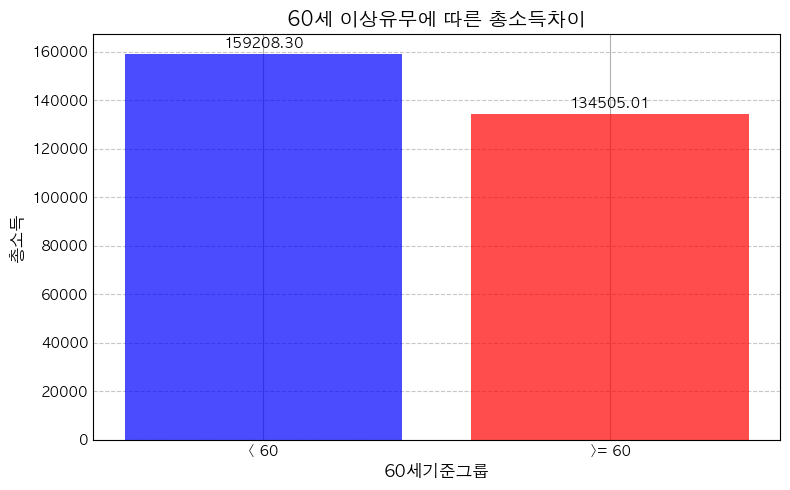

In [46]:

# 60세 기준으로 데이터 분리
df['AGE_GROUP'] = df['AGE'].apply(lambda x: '< 60' if x < 60 else '>= 60')

# 그룹별 총소득 평균 계산
income_means = df.groupby('AGE_GROUP')['AMT_INCOME_TOTAL'].mean()

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(income_means.index, income_means.values, color=['blue', 'red'], alpha=0.7)

# 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f'{yval:.2f}', ha='center', va='bottom')

# 그래프 꾸미기
plt.title('60세 이상유무에 따른 총소득차이', fontsize=14)
plt.ylabel('총소득', fontsize=12)
plt.xlabel('60세기준그룹', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 표시
plt.show()


* 60세 이상에서는 주된 소득원이 정기적인 근로 소득에서 은퇴 후 연금이나 기타 비정기적인 소득으로 전환되기 때문에, 총소득이 감소하는 경향이 있습니다.
* 60세 이상 그룹의 소득 감소는 대출 상환 가능성을 낮출 수 있는 요인으로 작용할 수 있습니다.



* 서브가설 2 : 성별과 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
  * 귀무가설 : 성별과 대출 상환 여부는 통계적으로 유의한 관계가 없다.
  * 대립가설 : 성별이 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
  * 성별_남성(CODE_GENDER_M)변수는 coef가 0.2457로 양수이므로 남성일 경우 대출 상환 불가능성이 증가합니다.
  * p-value가 0.000로 통계적으로 매우 유의미합니다.
  * 즉 귀무가설을 기각합니다. 고객의 성별은 대출 상환 여부에 유의미한 영향을 미칩니다. 
* 서브가설 3 : 결혼유무, 자녀수와 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
  * 귀무가설 : 결혼유무, 자녀수와 대출 상환 여부는 통계적으로 유의한 관계가 없다.
  * 대립가설 : 결혼유무, 자녀수가 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
  * 결혼 유무(IS_MARRIED)변수는 coef가 -0.1197로 음수이므로 결혼한 경우 대출 상환 불가능성이 감소합니다. 
    * p-value가 0.000으로 통계적으로 매우 유의미합니다.
  * 자녀 수 (CNT_CHILDREN)변수는 coef가 -0.0301로 음수이므로 자녀 수가 많을수록 대출 상환 불가능성이 감소합니다.
    * p-value가 0.007으로 통계적으로 매우 유의미합니다. 
  * 즉 귀무가설을 기각합니다. 결혼유무와 자녀수는 대출 상환 여부에 유의미한 영향을 미칩니다.
* 서브가설 4 : 학력수준과 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
  * 귀무가설 : 학력수준과 대출 상환 여부는 통계적으로 유의한 관계가 없다.
  * 대립가설 : 학력수준이 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
  * 학력수준(EDUCATION_LEVEL) 변수는 coef가 -0.2592로 음수이므로 학력이 높을 수록 대출 상환 불가능성이 감소합니다.
  * p-value가 0.000으로 통계적으로 매우 유의미합니다.
  * 즉 귀무가설을 기각합니다. 고객의 학력수준은 대출 상환 여부에 유의미한 영향을 미칩니다.
* 서브가설 5 : 직업과 대출 상환 가능성 간에 유의미한 상관관계가 있는가?
  * 귀무가설 : 직업과 대출 상환 여부는 통계적으로 유의한 관계가 없다.
  * 대립가설 : 직업이 대출 상환 여부에 통계적으로 유의미한 영향을 줄 수 있다.
  * 육체노동직군(OCCUPATION_GROUP_Labor Workers) 변수는 coef가 0.3678 양수로 육체 노동 직군은 대출 상환 불가능성이 증가합니다. 
    * p-value가 0.000으로 통계적으로 매우 유의미합니다.
  * 판매직(OCCUPATION_GROUP_Sales Staff) 변수는 coef가 0.3172 양수로 판매직군은 대출 상환 불가능성이 증가합니다.
    * p-value가 0.000으로 통계적으로 매우 유의미합니다.
  * 육체노동직군(OCCUPATION_GROUP_Labor Workers), 판매직(OCCUPATION_GROUP_Sales Staff)에 대해서는 귀무가설을 기각하고 해당직군은 대출 상환 여부에 유의미한 영향을 미칩니다.
  * 그 외 다른 직군에 대해서는 귀무가설을 채택하고 해당직군과 대출 상환 여부와는 유의미한 상관관계가 없습니다.

##### 2.2.3.3 예측

In [47]:
# 샘플 데이터 생성 (X와 동일한 열 구조)
sample_data = {
    'AGE': [35],  # 예: 나이
    'IS_MARRIED': [1],  # 예 : 결혼함
    'CNT_CHILDREN': [2],  # 예: 자녀 수
    'EDUCATION_LEVEL': [3],  # 예: 학력 수준
    'CODE_GENDER_M': [1],  # 예: 남성
    'OCCUPATION_GROUP_Labor Workers': [0],  # 예: 노동직군
    'OCCUPATION_GROUP_Sales Staff': [1],  # 예: 판매직군
    'OCCUPATION_GROUP_Unknown': [0],  # 예: 미정의
}
# 데이터프레임으로 변환
df_sample = pd.DataFrame(sample_data)

# 훈련 데이터(X)와 동일한 열로 정렬 (누락된 열은 0으로 채움)
df_test_single_aligned = pd.DataFrame(columns=X.columns)  # X의 열 구조를 기반으로 생성
df_test_single_aligned = pd.concat([df_test_single_aligned, df_sample], ignore_index=True)
df_test_single_aligned = df_test_single_aligned.fillna(0)  # 누락된 값은 0으로 채움

# 예측 수행
pred = result.get_prediction(exog=df_test_single_aligned)
summary = pred.summary_frame(alpha=0.05)

print(summary)

   predicted       se  ci_lower  ci_upper
0   0.212178  0.01029   0.19271  0.233045


* 샘플데이터인 35세 2명의 자녀가 있는 학력수준이 높으며 거주지/근무지가 일치하지 않으며,남성인 판매직 고객의 대출 불가능성 확률은 21.21%로 낮은 편입니다.
* 모델은 이 예측값에 대해 95% 신뢰구간을  19.27% ~ 23.30%로 제시합니다.
* 신뢰구간이 좁고 표준오차(0.01029)가 작아, 모델이 이 예측에 대해 상당히 높은 신뢰도를 가지고 있다고 볼 수 있습니다.